In [ ]:
print("Hello")

Hello


Low study:  [2.5, 1.5, 2.0, 2.5]
Moderate study:  [3.5, 5.0, 4.0, 3.0, 4.5, 3.0, 4.0, 5.0, 3.5]
High study:  [5.5, 6.0]
Number of low study days:  4
Number of moderate study days:  9
Number of high study days:  2
Study hours in munites:  [210.0, 300.0, 150.0, 240.0, 90.0, 180.0, 330.0, 120.0, 270.0, 180.0, 360.0, 150.0, 240.0, 300.0, 210.0]
Average study hours:  3.7
average entertainment hours:  2.5
Average sleep jours:  7.166666666666667


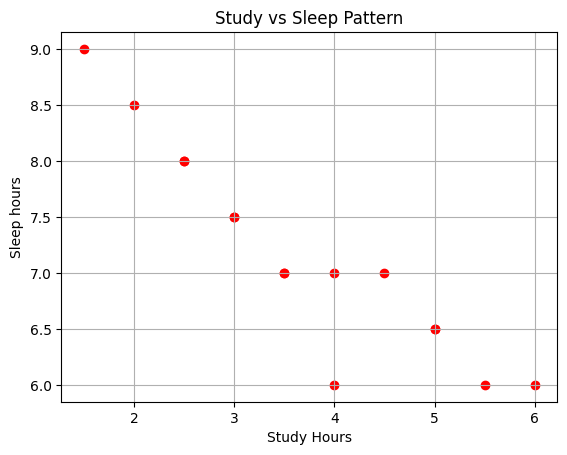

In [ ]:
#Question1
#Task 1
time_data = [(3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
(4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
(5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
(3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
(4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)]

#Creating empty lists for study time classifications
low_study=[]
moderate_study=[]
high_study=[]

#Iterate and classify study hour
for study, entertainment, sleep in time_data:
    if study < 3:
        low_study.append(study)
    elif 3 <= study <=5:
        moderate_study.append(study)
    else:
        high_study.append(study)

#Print lists to verify classifications
print("Low study: ", low_study)
print("Moderate study: ", moderate_study)
print("High study: ", high_study)

#Task 2
print("Number of low study days: ", len(low_study)) #Number of days of low study time
print("Number of moderate study days: ", len(moderate_study)) #days pf moderate study days
print("Number of high study days: ", len(high_study))

#Task 3
#Converting study hours to minutes
study_minutes=[]
for day in time_data:
    study = day[0]  #extract study hours
    minutes = study*60
    study_minutes.append(minutes)
print("Study hours in munites: ", study_minutes)


#Task 4
study_hours = []
entertainment_hours=[]
sleep_hours=[]
#Iterate over time_data
for study, entertainment, sleep in time_data:
    study_hours.append(study)
    entertainment_hours.append(entertainment)
    sleep_hours.append(sleep)

#calculate average
avg_study = sum(study_hours)/len(study_hours)
avg_entertainment = sum(entertainment_hours)/len(entertainment_hours)
avg_sleep = sum(sleep_hours)/len(sleep_hours)

print("Average study hours: ", avg_study)
print("average entertainment hours: ", avg_entertainment)
print("Average sleep jours: ", avg_sleep)

#Task 5
import matplotlib.pyplot as plt
plt.scatter(study_hours, sleep_hours, color="red")
plt.xlabel("Study Hours")
plt.ylabel("Sleep hours")
plt.title("Study vs Sleep Pattern")
plt.grid(True)
plt.show()

In [ ]:
#Queston2
#Recursion
#Task 1
def sum_nested_list(nested_list):
    total = 0
    for item in nested_list:
        if isinstance(item, list): #check if the item is a list
            total+=sum_nested_list(item) #recursive sum the nested list
        else:
            total+=item #add number to total
    return total

nested_list=[1,[2,[3, 4], 5], 6, [7, 8]]
print(sum_nested_list(nested_list))

#Task 2
def generate_permutations(s):
    # Base case: a single character or empty string
    if len(s) <= 1:
        return [s]

    perms = []  # list to store all permutations

    for i in range(len(s)):
        char = s[i] # pick a character
        remaining = s[:i] + s[i+1:] # remove that character

        # recursive call to get permutations of the remaining string
        for perm in generate_permutations(remaining):
            perms.append(char + perm)

    # return only unique permutations
    return list(set(perms))

print(generate_permutations("abc"))
print(generate_permutations("aab"))

#task 3
def calculate_directory_size(directory):
    total_size = 0

    for name, value in directory.items():
        if isinstance(value, dict):
            total_size += calculate_directory_size(value)
        else:
            total_size += value
    return total_size

directory_structure = {
       "file1.txt": 200,
       "file2.txt": 300,
       "subdir1": {
         "file3.txt": 400,
         "file4.txt": 100
       },
       "subdir2": {
         "subsubdir1": {
            "file5.txt": 250
          },
        "file6.txt": 150
    }
}
print("Total directory size: ", calculate_directory_size(directory_structure), "KB")

36
['bac', 'bca', 'cab', 'abc', 'acb', 'cba']
['aba', 'aab', 'baa']
Total directory size:  1400 KB


In [ ]:
#Question 3
#Coin Chnage Problem
def min_coins(coins, amount):
  dp = [float('inf')] * (amount + 1)
  dp[0] = 0

  for coin in coins:
    for i in range(coin, amount+1):
      dp[i] = min(dp[i], dp[i - coin] + 1)

  return - 1 if dp[amount] == float('inf') else dp[amount]
#Task 2
def longest_common_subsequences(s1, s2):
  m, n = len(s1), len(s2)
  dp = [[0] * (n+1) for _ in range(m+1)]

  for i in range(1, m+1):
    for j in range(1, n + 1):
      if s1[i-1] == s2[j-1]:
        dp[i][j] = dp[i-1][j-1]+1
      else:
        dp[i][j] = max(dp[i-1][j], dp[i][j-1])
  return dp[m][n]

  # return dp[m][n]
  # print(longest_common_subsequence("abcde", "ace"))

  #Task3
def knapsack(weights, values, capacity):
  n = len(weights)
  dp = [[0] * (capacity+1) for _ in range(n + 1)]

  for i in range(1, n + 1):
    for w in range(1, capacity + 1):
      if weights[i-1] <= w:
        dp[i][w] = max (
            values[i-1] + dp[i-1][w-weights[i-1]],
            dp[i-1][w]
        )
      else:
        dp[i][w] = dp[i-1][w]
  return dp[n][capacity]

print("Task 1 result: ", min_coins([1, 2, 5], 11))
print("Task 2 result: ", longest_common_subsequences("abcde", "ace"))
print("Task 3 result: ", knapsack([1, 3, 4, 5],[1, 4, 5, 7], 7))

Task 1 result:  3
Task 2 result:  3
Task 3 result:  9
